In [1]:
import numpy as np
import time
import os
from PIL import Image, ImageFilter

import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
model = models.efficientnet_v2_s(pretrained=True)
# model.eval()

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

In [4]:
preprocess = transforms.Compose([
#     transforms.RandomCrop((224, 224), pad_if_needed=True),
    transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(p = 0.5),
#     transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4355, 0.4345, 0.4332], std=[0.2830, 0.2826, 0.2818])
])

In [5]:
# Load and preprocess your image dataset
dataset = torchvision.datasets.ImageFolder(root='/var/scratch/xdu/true_dataset_small', transform=preprocess)

In [6]:
# Extract features for each image in the dataset
features = []
idx = 1
for image, _ in dataset:
    image = torch.unsqueeze(image, 0)  # Add batch dimension
    with torch.no_grad():
        feature = feature_extractor(image)
    features.append(feature.squeeze().numpy())  # Convert feature tensor to numpy array
    print(idx)
    idx += 1
#     print(f"extract features from image {idx} takes {int((end - start) / 1000)} ms ({end - start} seconds).")

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


1
extract features from image 2 takes 0 ms (0.5923857688903809 seconds).
2
extract features from image 3 takes 0 ms (0.5086174011230469 seconds).
3
extract features from image 4 takes 0 ms (0.3545374870300293 seconds).
4
extract features from image 5 takes 0 ms (0.7078597545623779 seconds).
5
extract features from image 6 takes 0 ms (0.39524269104003906 seconds).
6
extract features from image 7 takes 0 ms (0.6856765747070312 seconds).
7
extract features from image 8 takes 0 ms (0.5593698024749756 seconds).
8
extract features from image 9 takes 0 ms (0.6388130187988281 seconds).
9
extract features from image 10 takes 0 ms (0.6960725784301758 seconds).
10
extract features from image 11 takes 0 ms (0.8274195194244385 seconds).
11
extract features from image 12 takes 0 ms (0.8161885738372803 seconds).
12
extract features from image 13 takes 0 ms (0.9192888736724854 seconds).
13
extract features from image 14 takes 0 ms (0.3809216022491455 seconds).
14
extract features from image 15 takes 0

110
extract features from image 111 takes 0 ms (0.8679497241973877 seconds).
111
extract features from image 112 takes 0 ms (2.0378787517547607 seconds).
112
extract features from image 113 takes 0 ms (1.3851652145385742 seconds).
113
extract features from image 114 takes 0 ms (0.34076905250549316 seconds).
114
extract features from image 115 takes 0 ms (0.6805109977722168 seconds).
115
extract features from image 116 takes 0 ms (0.8394534587860107 seconds).
116
extract features from image 117 takes 0 ms (0.9110414981842041 seconds).
117
extract features from image 118 takes 0 ms (0.37183380126953125 seconds).
118
extract features from image 119 takes 0 ms (0.2820272445678711 seconds).
119
extract features from image 120 takes 0 ms (0.3047318458557129 seconds).
120
extract features from image 121 takes 0 ms (0.39229798316955566 seconds).
121
extract features from image 122 takes 0 ms (0.6895573139190674 seconds).
122
extract features from image 123 takes 0 ms (0.36800050735473633 secon

217
extract features from image 218 takes 0 ms (0.45039987564086914 seconds).
218
extract features from image 219 takes 0 ms (0.5111002922058105 seconds).
219
extract features from image 220 takes 0 ms (0.29799914360046387 seconds).
220
extract features from image 221 takes 0 ms (1.9654457569122314 seconds).
221
extract features from image 222 takes 0 ms (0.7213764190673828 seconds).
222
extract features from image 223 takes 0 ms (0.7315309047698975 seconds).
223
extract features from image 224 takes 0 ms (0.7173125743865967 seconds).
224
extract features from image 225 takes 0 ms (0.41523194313049316 seconds).
225
extract features from image 226 takes 0 ms (0.8053474426269531 seconds).
226
extract features from image 227 takes 0 ms (1.1028344631195068 seconds).
227
extract features from image 228 takes 0 ms (0.48102807998657227 seconds).
228
extract features from image 229 takes 0 ms (1.1141009330749512 seconds).
229
extract features from image 230 takes 0 ms (0.6992533206939697 secon

324
extract features from image 325 takes 0 ms (0.8244295120239258 seconds).
325
extract features from image 326 takes 0 ms (1.0671496391296387 seconds).
326
extract features from image 327 takes 0 ms (0.5221812725067139 seconds).
327
extract features from image 328 takes 0 ms (0.9140622615814209 seconds).
328
extract features from image 329 takes 0 ms (0.9169063568115234 seconds).
329
extract features from image 330 takes 0 ms (0.8476908206939697 seconds).
330
extract features from image 331 takes 0 ms (0.9382190704345703 seconds).
331
extract features from image 332 takes 0 ms (0.298736572265625 seconds).
332
extract features from image 333 takes 0 ms (0.3643045425415039 seconds).
333
extract features from image 334 takes 0 ms (0.3405895233154297 seconds).
334
extract features from image 335 takes 0 ms (0.35614967346191406 seconds).
335
extract features from image 336 takes 0 ms (0.4747779369354248 seconds).
336
extract features from image 337 takes 0 ms (0.4000215530395508 seconds).

431
extract features from image 432 takes 0 ms (0.5137887001037598 seconds).
432
extract features from image 433 takes 0 ms (0.5246078968048096 seconds).
433
extract features from image 434 takes 0 ms (1.2822020053863525 seconds).
434
extract features from image 435 takes 0 ms (1.037842035293579 seconds).
435
extract features from image 436 takes 0 ms (0.9939048290252686 seconds).
436
extract features from image 437 takes 0 ms (0.6238088607788086 seconds).
437
extract features from image 438 takes 0 ms (0.8118209838867188 seconds).
438
extract features from image 439 takes 0 ms (1.483940601348877 seconds).
439
extract features from image 440 takes 0 ms (0.5455160140991211 seconds).
440
extract features from image 441 takes 0 ms (0.30237603187561035 seconds).
441
extract features from image 442 takes 0 ms (1.0812551975250244 seconds).
442
extract features from image 443 takes 0 ms (2.2624776363372803 seconds).
443
extract features from image 444 takes 0 ms (1.5534718036651611 seconds).


538
extract features from image 539 takes 0 ms (0.38871073722839355 seconds).
539
extract features from image 540 takes 0 ms (0.5103840827941895 seconds).
540
extract features from image 541 takes 0 ms (0.6082334518432617 seconds).
541
extract features from image 542 takes 0 ms (0.9348323345184326 seconds).
542
extract features from image 543 takes 0 ms (0.292773962020874 seconds).
543
extract features from image 544 takes 0 ms (0.7983613014221191 seconds).
544
extract features from image 545 takes 0 ms (0.3131229877471924 seconds).
545
extract features from image 546 takes 0 ms (0.30281567573547363 seconds).
546
extract features from image 547 takes 0 ms (0.3248288631439209 seconds).
547
extract features from image 548 takes 0 ms (1.356921672821045 seconds).
548
extract features from image 549 takes 0 ms (0.29797816276550293 seconds).
549
extract features from image 550 takes 0 ms (0.5361683368682861 seconds).
550
extract features from image 551 takes 0 ms (1.5477502346038818 seconds)

In [7]:
# Convert features to a 2D numpy array
features = np.array(features)

In [8]:
# Apply K-means clustering
from sklearn.cluster import KMeans

num_clusters = 8  # Set the number of clusters (number of classes)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)

# Assign labels to the clusters
cluster_labels = kmeans.labels_

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
image_dir = '/var/scratch/xdu/true_dataset_small/dataset_small'

In [6]:
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

In [7]:
len(image_paths)

25000

In [13]:
import shutil
from torchvision.datasets import ImageFolder

# Create folders for each cluster
num_clusters = max(cluster_labels) + 1

for cluster_id in range(num_clusters):
    cluster_folder = f'/var/scratch/xdu/classified_char_kmean/Cluster-{cluster_id}'
    os.makedirs(cluster_folder, exist_ok=True)

# Move images to their respective cluster folders
for filename, cluster_id in zip(image_paths, cluster_labels):
    cluster_folder = f'/var/scratch/xdu/classified_char_kmean/Cluster-{cluster_id}'
    shutil.move(filename, cluster_folder)

In [5]:
all_cropped_char_dir = '/var/scratch/xdu/all_32k_for_kmeans'

In [ ]:
features = []
idx = 1

# Iterate over all files in the folder
for filename in os.listdir(all_cropped_char_dir):
    # Load and preprocess the image
    image_path = os.path.join(all_cropped_char_dir, filename)
    image = Image.open(image_path)
    
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = preprocess(image)
    image = torch.unsqueeze(image, 0)
    
    # Pass the preprocessed image through the model to extract features
    with torch.no_grad():
        feature = feature_extractor(image)

    # Flatten the features and convert them to a 1D numpy array
    features.append(feature.squeeze().numpy())
    
#     if idx % 200 == 0:
#         print(idx)
    print(idx)
    idx += 1

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [7]:
# Convert features to a 2D numpy array
features = np.array(features)

In [8]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/var/scratch/xdu/all_3k_train_true_label_csv.csv')

# Create a dictionary mapping image names to true labels
true_labels_dict = pd.Series(df.true_cat.values,index=df.image_id).to_dict()

In [9]:
true_labels_dict

{'cropped0.png': 5,
 'cropped2.png': 5,
 'cropped3.png': 2,
 'cropped4.png': 2,
 'cropped7.png': 2,
 'cropped8.png': 2,
 'cropped10.png': 2,
 'cropped14.png': 2,
 'cropped15.png': 2,
 'cropped18.png': 2,
 'cropped21.png': 5,
 'cropped24.png': 5,
 'cropped28.png': 2,
 'cropped30.png': 2,
 'cropped33.png': 2,
 'cropped34.png': 5,
 'cropped35.png': 1,
 'cropped39.png': 5,
 'cropped41.png': 2,
 'cropped42.png': 5,
 'cropped43.png': 5,
 'cropped44.png': 5,
 'cropped46.png': 2,
 'cropped52.png': 5,
 'cropped56.png': 7,
 'cropped59.png': 7,
 'cropped63.png': 6,
 'cropped64.png': 6,
 'cropped65.png': 6,
 'cropped75.png': 7,
 'cropped78.png': 7,
 'cropped82.png': 7,
 'cropped85.png': 6,
 'cropped87.png': 7,
 'cropped104.png': 7,
 'cropped125.png': 3,
 'cropped130.png': 6,
 'cropped150.png': 1,
 'cropped153.png': 5,
 'cropped154.png': 5,
 'cropped170.png': 4,
 'cropped176.png': 2,
 'cropped179.png': 2,
 'cropped182.png': 5,
 'cropped212.png': 2,
 'cropped213.png': 3,
 'cropped214.png': 5,
 'crop

In [20]:
import pandas as pd

# creating a dictionary for mapping
replacement_dict = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 4}

# replacing the labels in DataFrame
df['true_cat_rank'] = df['true_cat'].replace(replacement_dict)

# Create a dictionary mapping image names to true labels
true_labels_dict_rank = pd.Series(df.true_cat_rank.values,index=df.image_id).to_dict()

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import entropy as scipy_entropy

def purity_score(y_true, y_pred):
    # Compute confusion matrix
    contingency_matrix = confusion_matrix(y_true, y_pred)
    # Return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

def entropy_score(y_true, y_pred):
    # Compute contingency matrix
    contingency_matrix = confusion_matrix(y_true, y_pred)
    # Calculate the proportion of data points in each cluster
    proportions = np.sum(contingency_matrix, axis=0) / np.sum(contingency_matrix)
    # Calculate the entropy for each cluster
    entropies = np.array([scipy_entropy(cluster) for cluster in contingency_matrix.T])
    # Return the weighted average entropy
    return np.sum(proportions * entropies)

In [11]:
# Get the list of image names in the same order as the features
all_image_names = []

for filename in os.listdir(all_cropped_char_dir):
    all_image_names.append(filename)

In [21]:
# Get the true labels in the same order as the labeled images and filter the features
labeled_image_names = [name for name in all_image_names if name in true_labels_dict_rank]
labeled_features = features[np.isin(all_image_names, labeled_image_names)]
y_true = [true_labels_dict_rank[name] for name in labeled_image_names]

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARI

purities = []
entropies = []
nmis = []
aris = []
K_values = range(2, 51) 

for K in K_values:
    # Run K-means
    kmeans = KMeans(n_clusters=K, random_state=0).fit(labeled_features)
    
    # Predict the cluster for each sample
    y_pred = kmeans.predict(labeled_features)
    
    # Calculate and store the purity
    purity = purity_score(y_true, y_pred)
    purities.append(purity)
    entropy = entropy_score(y_true, y_pred)
    entropies.append(entropy)
    nmi_score = NMI(y_true, y_pred)
    nmis.append(nmi_score)
    ari_score = ARI(y_true, y_pred)
    aris.append(ari_score)

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/scipy/stats/_entropy.py:135: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/scipy/stats/_entropy.py:135: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value o

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var

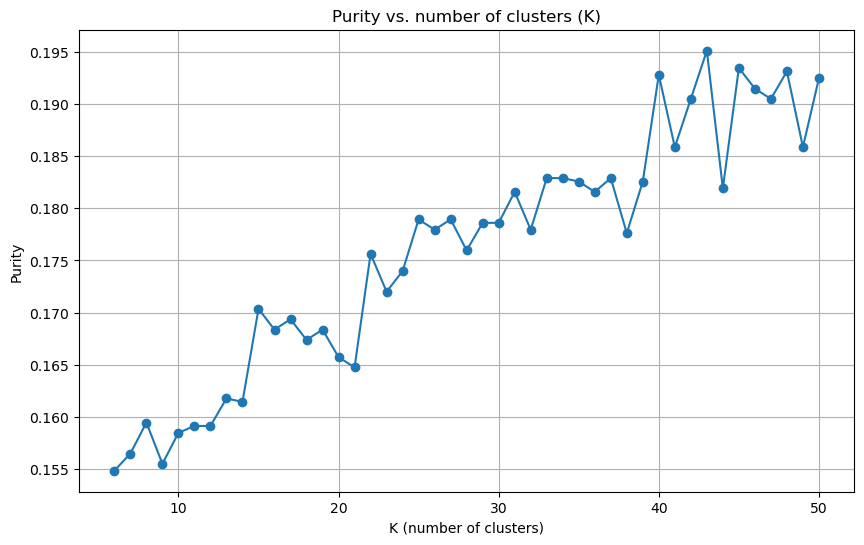

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(K_values, purities, marker='o')
plt.title('Purity vs. number of clusters (K)')
plt.xlabel('K (number of clusters)')
plt.ylabel('Purity')
plt.grid(True)
plt.show()

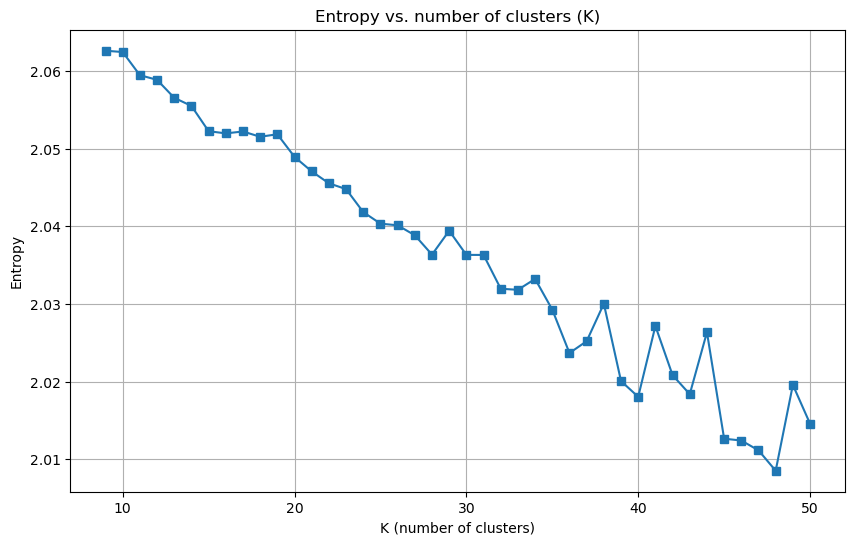

In [15]:
plt.figure(figsize=(10,6))
plt.plot(K_values, entropies, marker='s')
plt.title('Entropy vs. number of clusters (K)')
plt.xlabel('K (number of clusters)')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()

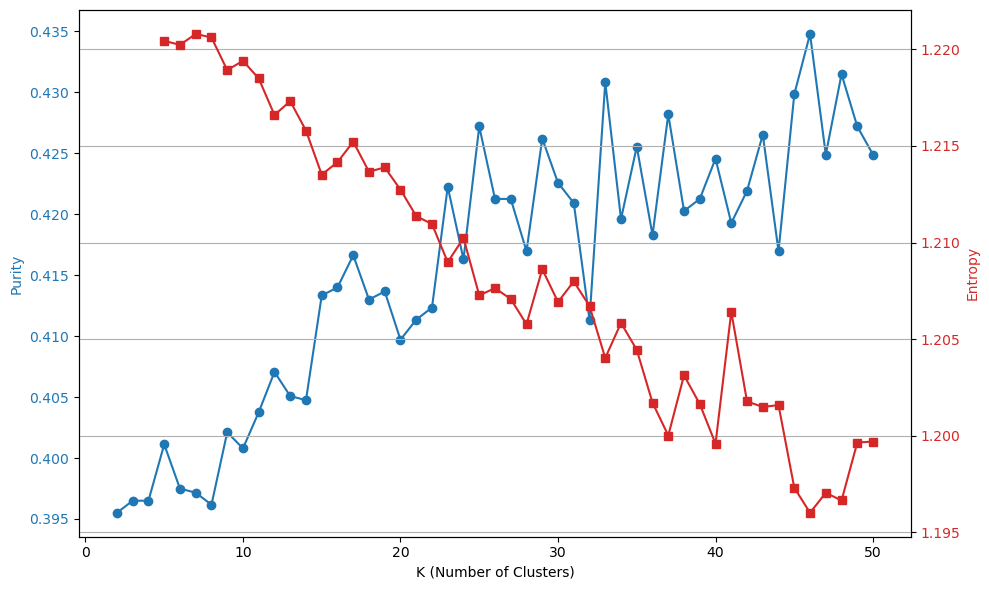

In [23]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('K (Number of Clusters)')
ax1.set_ylabel('Purity', color=color)
ax1.plot(K_values, purities, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Entropy', color=color)
ax2.plot(K_values, entropies, color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to make sure the right y-label is not slightly clipped
plt.grid(True)
plt.show()

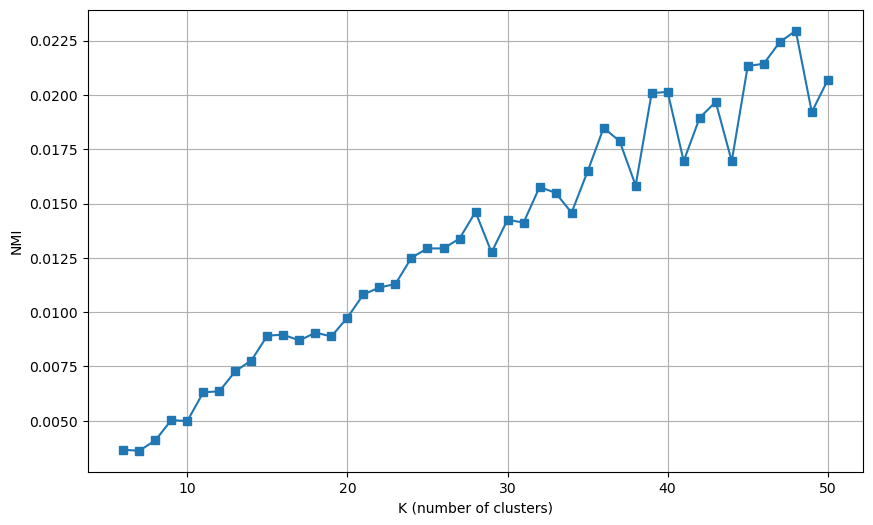

In [17]:
plt.figure(figsize=(10,6))
plt.plot(K_values, nmis, marker='s')
# plt.title('Entropy vs. number of clusters (K)')
plt.xlabel('K (number of clusters)')
plt.ylabel('NMI')
plt.grid(True)
plt.show()

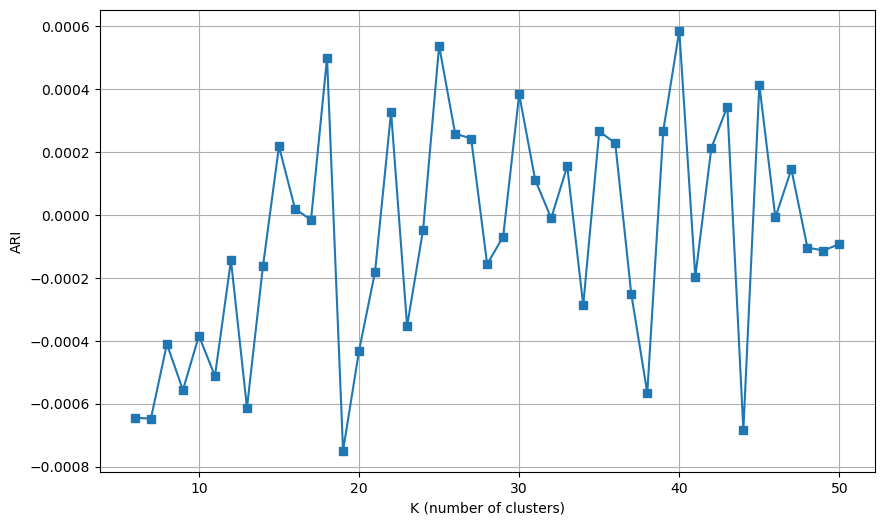

In [18]:
plt.figure(figsize=(10,6))
plt.plot(K_values, aris, marker='s')
# plt.title('Entropy vs. number of clusters (K)')
plt.xlabel('K (number of clusters)')
plt.ylabel('ARI')
plt.grid(True)
plt.show()

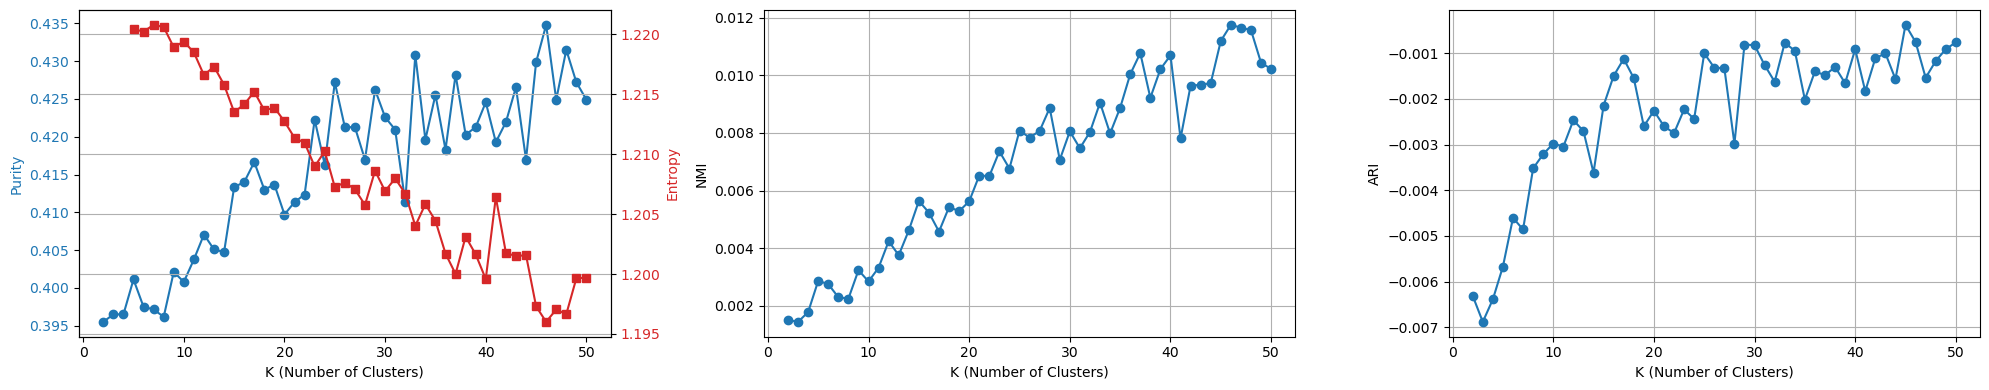

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with a single row of three subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

color = 'tab:blue'
axs[0].set_xlabel('K (Number of Clusters)')
axs[0].set_ylabel('Purity', color=color)
axs[0].plot(K_values, purities, color=color, marker='o')
axs[0].tick_params(axis='y', labelcolor=color)

ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Entropy', color=color)
ax2.plot(K_values, entropies, color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # to make sure the right y-label is not slightly clipped
plt.grid(True)

axs[1].plot(K_values, nmis, marker='o')
axs[1].set_xlabel('K (Number of Clusters)')
axs[1].set_ylabel('NMI')
axs[1].grid(True)   # Enable grid

axs[2].plot(K_values, aris, marker='o')
axs[2].set_xlabel('K (Number of Clusters)')
axs[2].set_ylabel('ARI')
axs[2].grid(True)   # Enable grid

# Improve the layout
plt.tight_layout()
# plt.grid(True)

# Display the figure
plt.show()

In [10]:
# Apply K-means clustering
from sklearn.cluster import KMeans

num_clusters = 8  # Set the number of clusters (number of classes)

kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=42)
kmeans.fit(features)

# Assign labels to the clusters
cluster_labels = kmeans.labels_

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(f"Number of iterations run: {kmeans.n_iter_}")
print(f"Inertia: {kmeans.inertia_}")

Number of iterations run: 18
Inertia: 8176.29345703125


In [105]:
iter

127

/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/scratch/xdu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var

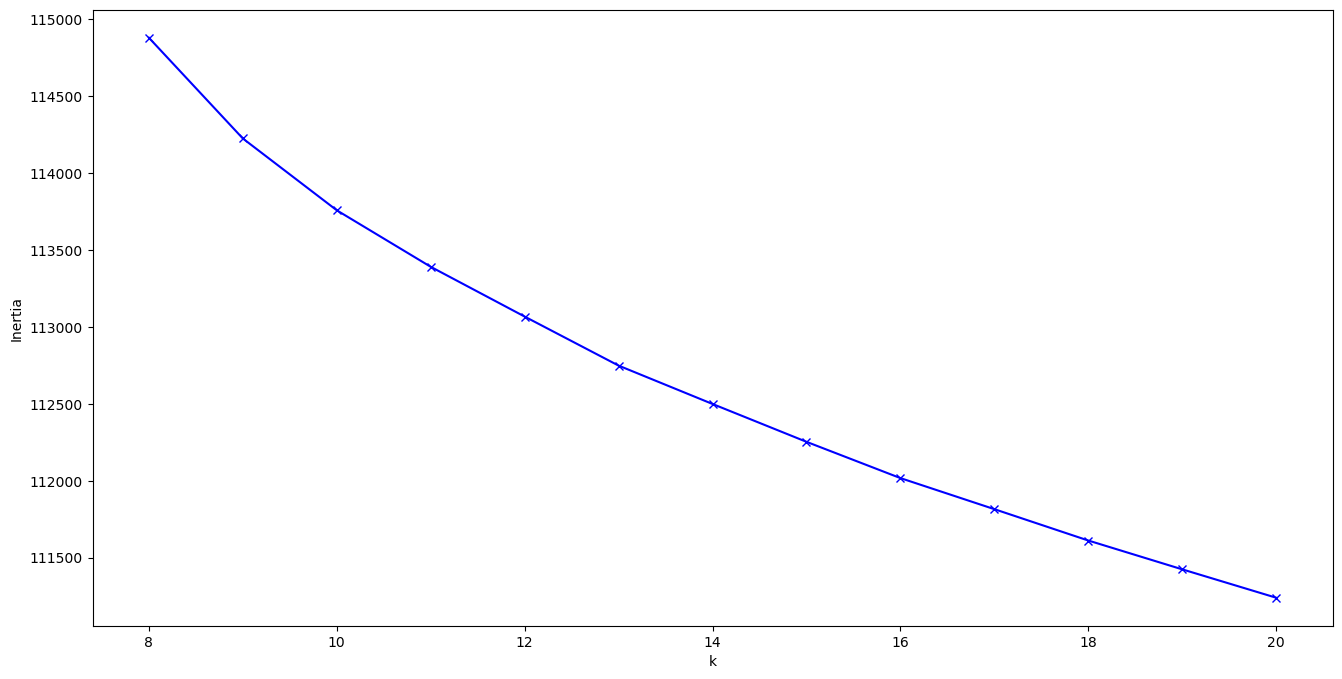

In [93]:
import matplotlib.pyplot as plt

# Assuming X is your data
inertias = []
K = range(8, 21)  # Change this range according to your needs

for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000, random_state=42)
    kmeanModel.fit(features)
    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
# plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
all_cropped_char_paths = [os.path.join(all_cropped_char_dir, filename) for filename in os.listdir(all_cropped_char_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

In [13]:
import shutil
from torchvision.datasets import ImageFolder

# Create folders for each cluster
num_clusters = max(cluster_labels) + 1

for cluster_id in range(num_clusters):
    cluster_folder = f'/var/scratch/xdu/classify_res_pretrain_kmean_8cat_test/Cluster-{cluster_id}'
    os.makedirs(cluster_folder, exist_ok=True)

# Move images to their respective cluster folders
for filename, cluster_id in zip(all_cropped_char_paths, cluster_labels):
    cluster_folder = f'/var/scratch/xdu/classify_res_pretrain_kmean_8cat_test/Cluster-{cluster_id}'
    shutil.copy2(filename, cluster_folder)
#     shutil.copy2(filename, cluster_folder + filename.split("/")[-1])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def purity_score(y_true, y_pred):
    # Compute contingency matrix (also called confusion matrix)
    contingency_matrix = confusion_matrix(y_true, y_pred)
    # Return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(y_true, y_pred)

In [79]:
import shutil
from torchvision.datasets import ImageFolder

# Create folders for each cluster
num_clusters = max(cluster_labels) + 1

# for cluster_id in range(num_clusters):
#     cluster_folder = f'/var/scratch/xdu/classify_res_pretrain_kmean_14cat/Cluster-{cluster_id}'
#     os.makedirs(cluster_folder, exist_ok=True)

# Move images to their respective cluster folders
for filename, cluster_id in zip(all_cropped_char_paths, cluster_labels):
    cluster_folder = f'/var/scratch/xdu/classify_res_pretrain_kmean_12cat/Cluster-{cluster_id}'
    shutil.copy2(filename, cluster_folder)
#     shutil.copy2(filename, cluster_folder + filename.split("/")[-1])

In [81]:
import os

for i in range(12):
    image_files = os.listdir(f'/var/scratch/xdu/classify_res_pretrain_kmean_12cat/Cluster-{i}')
    print(len([name for name in image_files]))

6182
1268
3773
3659
1837
2950
1151
1719
1572
545
970
4992


In [13]:
print(len(cluster_labels))

30618
